<h1>Unsupervied Learning</h1>
<h3>In this notebook we will conduct  unsupervied learning for Iris datasets</h3>

<p>(Data from Fisher, 1936 https://archive.ics.uci.edu/ml/datasets/iris)</p>


In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
%matplotlib inline
import sklearn

In [2]:
ls

Untitled.ipynb  iris.data.csv


In [37]:
# we dont' have a header(feature names), we set header:= None
iris_data = pd.read_csv("iris.data.csv", header=None)

<h2>Data Exploration</h2>

<p>In this section, we will split the data into trainining and test set; then we will explore the dataset</p>

In [38]:
iris_data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
# we change the features of the data to explicit names

iris_data.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]

In [40]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [41]:
X_data = iris_data[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
y_data = iris_data["class"]

In [42]:
y_data.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object

In [43]:
y_data[0]

'Iris-setosa'

In [44]:
# encoding class labels
class_mapping = {label:idx for idx, label in enumerate(np.unique(y_data))}
print(class_mapping)

{'Iris-setosa': 0, 'Iris-virginica': 2, 'Iris-versicolor': 1}


In [52]:
y_data.values.shape

(150,)

In [65]:
# encoding class labels
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
y_data_en = le.fit_transform(y_data.values)
print(y_data_en[:10])
print(y_data_en)

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [66]:
# print the encoding labels
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [77]:
# By default, train and test set will be splitted into 0.75% and 0.25% of original dataset
# By default, dataset is shuffled before the split
# set random_state in order for later replication(we can replicate the result this way since
# same split will occur if we use the same random_state number)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data_en, random_state=7)

In [78]:
print("X_train and X_test shape : {0} vs {1}".format(X_train.shape, X_test.shape) )
print("y_train and y_test shape : {0} vs {1}".format(y_train.shape, y_test.shape))

X_train and X_test shape : (112, 4) vs (38, 4)
y_train and y_test shape : (112,) vs (38,)


In [99]:
# inspect the numerical reprensentation of each feature
X_train.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,112.000000,112.000000,112.000000,112.000000
mean,5.843750,3.050893,3.728571,1.183929
std,0.856536,0.436405,1.802622,0.777331
min,4.300000,2.000000,1.100000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.750000,3.000000,4.200000,1.300000
75%,6.400000,3.300000,5.100000,1.900000
max,7.900000,4.400000,6.900000,2.500000


<h3>Selecting samples</h3>
<p>we will select three samples to explore them later. We will choose them so that they 
    are distinct (each feature value are different) from each other</p>
    
<p> we will choose three examples as follows:<br>
    <ol>
        <li>sample_1 = septal_length is maximum in the data</li>
        <li>sample_2 = sepal length is the closest to the mean value</li>
        <li>sample_3 = sepal width is the closest to the mean value</li>
    </ol>
<p>

In [126]:
# Choose a sample whose septal_length is maximum
X_train.loc[X_train["sepal_length"] >= 7.8]

,sepal_length,sepal_width,petal_length,petal_width
131,7.9,3.8,6.4,2.0


In [124]:
sample_1 = X_train.loc[X_train["sepal_length"] >= 7.8]

In [162]:
# Choose a sample whose sepal length is the closest to the mean value
X_train.loc[(abs(X_train["sepal_length"] - X_train["sepal_length"].mean())).argmin()]

sepal_length    5.8
sepal_width     4.0
petal_length    1.2
petal_width     0.2
Name: 14, dtype: float64

In [159]:
sample_2 = X_train.loc[14]

In [163]:
# Choose a sample whose petal width is the closest to the mean value
X_train.loc[(abs(X_train["petal_width"] - X_train["petal_width"].mean())).argmin()]

sepal_length    5.7
sepal_width     3.0
petal_length    4.2
petal_width     1.2
Name: 95, dtype: float64

In [164]:
sample_3 = X_train.loc[95]

In [165]:
# create a holder for the three samples chosen
samples = [sample_1, sample_2, sample_3]

In [194]:
indices = [131, 14, 95]
samples = pd.DataFrame(X_train.loc[indices], columns=X_train.keys()).reset_index(drop=True)
print("Chosen samples of iris dataset")
samples

Chosen samples of iris dataset


,sepal_length,sepal_width,petal_length,petal_width
0,7.9,3.8,6.4,2.0
1,5.8,4.0,1.2,0.2
2,5.7,3.0,4.2,1.2


<h3>Feature dependence</h3>
<p>One thing we can find from data is that some feature is predictive of others. In other words, is it possible to predict the sepal length using the other 3 features? (This is one case. This does not have to be a sepal length. We can choose any feature to be inspected.)</p>
<p>We will choose "sepal length" as a target class and use other featuers for supervised learning models.</p>

In [173]:
# Copy the X_train data and split them into a target(a dependent variable) 
# and independet variables
pseudo_target = X_train['sepal_length']
pseudo_data = X_train.drop(['sepal_length'], axis=1)

# Split the data into training and testing sets: 0.75 goes to training set.
X_pseudo_train, X_pseudo_test, y_pseudo_train, y_pseudo_test\
    = train_test_split(pseudo_data, pseudo_target, random_state=7)
    
# Use a decision tree regressorn to fit and infer the target values 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=7)
regressor.fit(X_pseudo_train, y_pseudo_train)
y_pseduo_pred = regressor.predict(X_pseudo_test)
from sklearn.metrics import r2_score
score = r2_score(y_pseudo_test, y_pseduo_pred)
print(score)

0.838404550867


<h3>The coefficient of determination, R<sup>2</sup> is 0.83</h3>
<p>So about 83% of the variance of target variable is explained by the three variables.
It is clear that there is a dependency of this target variable(petal length) on the three variables. We could drop the "petal length" feature for reducing the dimentionality.(thus
reducing the run-time cost)</p>

<h3>Visuzlize Feature Distributions</h3>

<p>In order to get sense of data, we will plot the feature distribution.
In this way, we can understand not only the each feature's distribution but also the
correlation between each feature.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1816a898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a1fe74ba8>]], dtype=object)

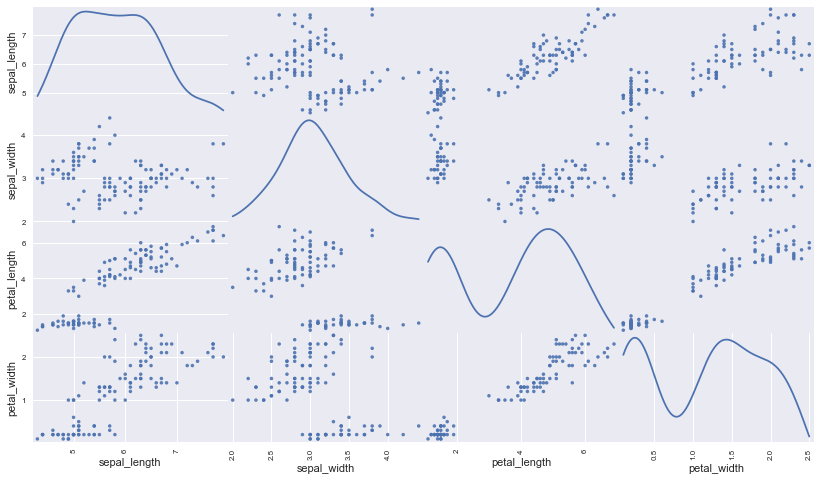

In [203]:
pd.plotting.scatter_matrix(X_train, alpha=0.9, figsize=(14, 8), diagonal="kde")


<h3>What we can infer from the data plot above</h3>

<h4>Each feature distribution:</h4><br>
Sepal length and petal length are almost following normal distribution (Sepal length
does not trace bell curve though).
Petal length and petal width trace bimodal distribution (meaning that there are two groups or two most frequent samples) 


<h4>Correlation:</h4><br>
Positive correlation can be seen between sepal_length and petal_length, between petal_length  and petal_width. Septal_length and petal_width are somewhat correlated positively but it is not clear.

We can confirm the correlation we inferred above by using a heatmap.

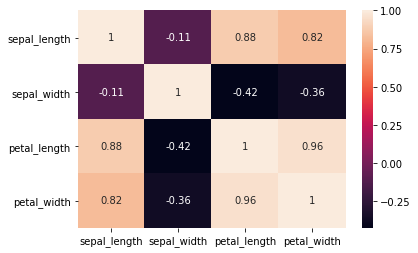

In [97]:
sns.heatmap(X_train.corr(), annot=True)

Our inference is confirmed.

Positive correlation ( in decreasing order ) for 3 distributions:

    1. 0.96 for petal_length and petal_width
    2. 0.88 for septal_length and petal_length
    3. 0.82 for petal_width and septa_length

<h2>Data Preprocessig</h2>
<p>We will transform the data into an appropriate distribution.<br>
We will also detect outliers and deal with them.</p>

<p>Some machine-leanrning algorithms are sensetive to the data distribution. It is often preferable to pre-scale the datasets</p>
<p>We will scale dataset (StandardScaler) so that each feature will have zero mean and unit variance.(This does not necessarily mean that each feature will trace Gaussian Distribution)</p>

In [242]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
samples_scaled = scaler.transform(samples)
X_test_scaled = scaler.transform(X_test)
print("Mean of value for each feature before scaling\n{0}".format(X_train.mean(axis=0)))
print("Variance of value for each feature before scaling\n{0}".format(X_train.var(axis=0)))
print("Mean of value for each feature after scaling\n{0}".format(X_train_scaled.mean(axis=0)))
print("Vaiance of value for each feature after scaling\n{0}".format(X_train_scaled.var(axis=0)))

Mean of value for each feature before scaling
sepal_length    5.843750
sepal_width     3.050893
petal_length    3.728571
petal_width     1.183929
dtype: float64
Variance of value for each feature before scaling
sepal_length    0.733654
sepal_width     0.190450
petal_length    3.249447
petal_width     0.604244
dtype: float64
Mean of value for each feature after scaling
[ -3.96508223e-17   6.58203650e-16  -5.55111512e-17  -3.01346250e-16]
Vaiance of value for each feature after scaling
[ 1.  1.  1.  1.]


In [233]:
type(X_train_scaled)

numpy.ndarray

In [234]:
type(X_train)

pandas.core.frame.DataFrame

In [235]:
X_train.shape

(112, 4)

In [236]:
pd_X_train_scaled = pd.DataFrame({"sepal_length": X_train_scaled[:,0], 
                                  "sepal_width": X_train_scaled[:, 1],
                                  "petal_length": X_train_scaled[:, 2], 
                                  "petal_width": X_train_scaled[:, 3]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20f215f8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a212c14a8>]], dtype=object)

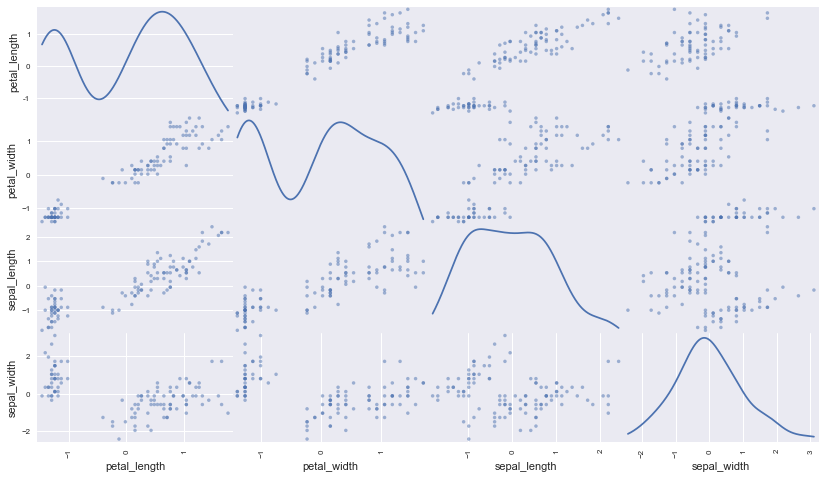

In [237]:
pd.plotting.scatter_matrix(pd_X_train_scaled, figsize=(14, 8), diagonal="kde")

In [246]:
pd_samples_scaled = pd.DataFrame({"sepal_length": samples_scaled[:,0], 
                                  "sepal_width": samples_scaled[:, 1],
                                  "petal_length": samples_scaled[:, 2], 
                                  "petal_width": samples_scaled[:, 3]})
pd_samples_scaled

,petal_length,petal_width,sepal_length,sepal_width
0,1.488629,1.054556,2.411447,1.724255
1,-1.409023,-1.271467,-0.051307,2.184604
2,0.262699,0.020768,-0.168581,-0.117142


<h3>Outlier detection</h3>
<p>We will detect outliers and deal with them</p>
<p> We will use <a href="http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/">Turkey's Method for identifying outliers</a> for identifying outliers</p>

In [253]:
outliers = []

for feature in pd_X_train_scaled.keys():
    q1 = np.percentile(pd_X_train_scaled[feature], 25, axis=0)
    q3 = np.percentile(pd_X_train_scaled[feature], 75, axis=0)
    step = 1.5 * float(q3-q1)
    print("Data points considered outliers for the feature {0}".format(feature))
    
    pd_X_train_scaled[~((pd_X_train_scaled[feature] >= q1 - step)&(pd_X_train_scaled[feature] <= q3+step))]

Data points considered outliers for the feature petal_length
Data points considered outliers for the feature petal_width
Data points considered outliers for the feature sepal_length
Data points considered outliers for the feature sepal_width


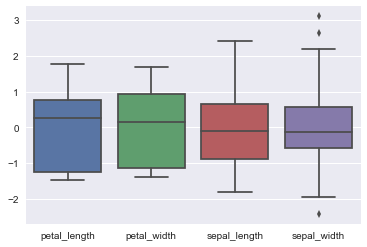

In [251]:
sns.boxplot(data=pd_X_train_scaled)

<p>Fowllowing Turkey's Method for identifying outliers, 
we do not have outliers in this datasets</p>

In [36]:
# create a dictionary for decoding class labels for later purpose
inv_class_mapping = {idx:label for label, idx in class_mapping.items()}
print(inv_class_mapping)

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}


In [33]:
y_data = y_data.map(class_mapping)
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_data[])